### === Task ===

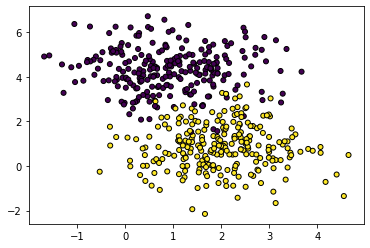

In [1]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

1. Put everything into a class called LogisticRegression. The training method should be "minibatch".

2. Perform a classification on the data given above.

3. Plot training losses as number of iters increases.

4. Write a class called classification_report containing 4 functions (Accuracy, Recall, Precision, F1) and use it to evaluate your model.

In [2]:
# match the shapes of X and y
# print(X.shape)
# print(y.shape)
assert X.shape[0] == y.shape[0]

In [3]:
# standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)
# print(X)

In [4]:
# Train Test Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
assert X_train.shape[0] == y_train.shape[0]

(350, 2)
(150, 2)
(350,)
(150,)


In [5]:
# add intercept
intercept = np.ones((X_train.shape[0],1))
# print(intercept.shape)
X_train = np.concatenate((intercept, X_train), axis = 1)
# print(X_train.shape)
intercept = np.ones((X_test.shape[0],1))
print(intercept.shape)
X_test = np.concatenate((intercept, X_test), axis = 1)
# print(X_test.shape)
w = np.ones(X_train.shape[1])

(150, 1)


In [6]:
class LogisticRegression:

    def __init__ (self, max_iter = 10000):
        self.max_iter = max_iter
    
    def sigmoid (self, x):
        return 1/(1+np.exp(-x))

    def h_theta (self, X):
        return self.sigmoid(X @ self.w)

    def gradient (self, X, y):
        m = X.shape[0]
        h = self.h_theta(X)
        error = h - y
        cost = -np.sum(y * np.log(h) + (1-y) * np.log(1-h))
        grad = np.dot(X.T, error)
        return grad, cost

    def mini_batch(self, X, y):
        self.w = np.ones(X.shape[1])
        alpha = 0.001
        batch_size = int(0.1 * X.shape[0])
        self.cost_list = []
        self.iter_list = []
        for i in range (self.max_iter):
            si = np.random.permutation(X.shape[0])
            X_shuffle = X[si]
            y_shuffle = y[si]
            for j in range (0, X.shape[0], batch_size):
                Xi = X_shuffle[j: j+batch_size]
                yi = y_shuffle[j: j+batch_size]
                grad, cost = self.gradient(Xi, yi)
                self.w = self.w - alpha * grad
            if i % 500 == 0:
                print(f'Cost at iteration {i}', cost)
                self.cost_list.append(cost)
                self.iter_list.append(i)
        return self.w

    def predict(self, y):
        return np.round(y)
    
    def plot(self):
        plt.plot(self.iter_list, self.cost_list, label = "training loss")
        plt.xlabel("number of iterations")
        plt.ylabel("cost")
        plt.title("Training loss over iterations")
        plt.legend(loc = "best")

Cost at iteration 0 31.451191579371024
Cost at iteration 500 2.2127027194642555
Cost at iteration 1000 2.416884874457353
Cost at iteration 1500 4.125894387626764
Cost at iteration 2000 1.5071940395410888
Cost at iteration 2500 4.819124408098794
Cost at iteration 3000 1.3707746305547086
Cost at iteration 3500 1.5146703793614813
Cost at iteration 4000 1.0872746558481199
Cost at iteration 4500 2.136123809618251
Cost at iteration 5000 0.4731666710617649
Cost at iteration 5500 1.909487144604962
Cost at iteration 6000 4.131283506259178
Cost at iteration 6500 1.9772715258845994
Cost at iteration 7000 1.5969922925388187
Cost at iteration 7500 0.9269573527496868
Cost at iteration 8000 1.912260611243208
Cost at iteration 8500 2.8930748518923965
Cost at iteration 9000 1.5847993374957428
Cost at iteration 9500 1.455592166111507


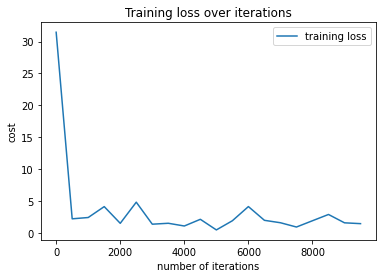

In [7]:
model = LogisticRegression()
model.mini_batch(X_train, y_train)
model.plot()

In [8]:
y_predict = model.h_theta(X_test)
y_output = model.predict(y_predict)
y_output

array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.])

In [9]:
class Classification_Report:
    def __init__(self, y_output, y):
        self.y_output = y_output
        self.y = y
        self.TP = np.sum((y_output == 1) & (y == 1))
        self.TN = np.sum((y_output == 0) & (y == 0))
        self.FP = np.sum((y_output == 1) & (y == 0))
        self.FN = np.sum((y_output == 0) & (y == 1))
       
    def accuracy(self):
        return (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)
    
    def recall(self):
        return self.TP/ (self.TP + self.FN)
    
    def precision(self):
        return self.TP / (self.TP + self.FP)
    
    def f1(self):
        return 2 * (self.precision() * self.recall()) / (self.precision() + self.recall())

In [10]:
result = Classification_Report(y_output, y_test)
result.accuracy()

0.9666666666666667

In [11]:
result.precision()

0.9871794871794872

In [12]:
result.recall()

0.9506172839506173

In [13]:
result.f1()

0.9685534591194969